<a href="https://colab.research.google.com/github/Supathatkh/datasci_/blob/main/05t_02_classification_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# บทที่ 5t (2/2) - Classification การประเมินความแม่นยำของโมเดล

อ.ดร.ธนชาตย์ ฤทธิ์บำรุง (อ.เชค)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/05t_02_classification_evaluation.ipynb)

**เป้าหมายการเรียนรู้**
1. เข้าใจถึงเลือกใช้ Metric ในการประเมินความแม่นยำของโมเดล
2. เข้าใจถึงปัญหา Imbalanced Dataset
3. สามารถแก้ไขปัญหา Imbalanced Dataset เบื้องต้นได้

# Confusion Matrix

**การกำหนด Positive Case**

*   เป็นเหตุการณ์ที่เราสนใจ
*   เป็นเหตุการณ์ที่แตกต่างจากสภาพปัจจุบัน

ตัวอย่างเช่น

*   ติดโควิด
*   ตอบรับ SMS Campaign
*   ยกเลิกสมาชิก
*   โดน Hack





<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/36.png width="750px">

*   T นำหน้าแปลว่า ทำนายถูก
*   F นำหน้าแปลว่า ทำนายผิด

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/37.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1


<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/38.PNG width="750px">

*   TN = 1
*   FN = 2
*   FP = 1
*   TP = 2

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/39.PNG width="750px">

*   TN = 8
*   FN = 2
*   FP = 2
*   TP = 8
*   Accuracy = 16/20 = 0.80

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/40.PNG width="750px">

*   TN = 18
*   FN = 2
*   FP = 0
*   TP = 0
*   Accuracy = 18/20 = 0.80

In [1]:
## run code นี้ก่อนที่จะใช้ command เกี่ยวกับ confusion matrix และ recall precision F1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

url = 'https://github.com/ai-builders/curriculum/raw/main/data/marketing_campaign.csv'
df = pd.read_csv(url, parse_dates=['Dt_Customer'])

df = df.dropna(how='any',axis=0) 

X = df.drop(['ID', 'Response', 'Year_Birth', 'Dt_Customer', 'Education','Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')

In [2]:
# สร้าง confusion matrix

from sklearn.metrics import confusion_matrix

clf_model = logreg.fit(X_train, y_train)
y_hat_train = clf_model.predict(X_train)

confusion_matrix(y_train, y_hat_train)

array([[223,  45],
       [ 54, 210]])

In [3]:
# แยก tn, fp, fn, tp

tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()

(tn, fp, fn, tp)

(223, 45, 54, 210)

## Recall, Precision, and F1 Score

$$ Recall = \frac{TP}{Total \, P} = \frac{TP}{FN+TP} $$

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/41.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1
*   Recall = 1/2 = 0.50

$$ Precision = \frac{TP}{Total \, Y} = \frac{TP}{FP+TP} $$

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/42.PNG width="750px">

*   TN = 2
*   FN = 1
*   FP = 2
*   TP = 1
*   Precision = 1/3 = 0.33



$$ F1 = \frac{2 × Recall × Precision}{Recall + Precision} $$

F1 = (2 x 0.5 x 0.33) / (0.5 + 0.33) = 0.40

In [4]:
# คำนวณ recall, precision, f1

from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_train, y_hat_train)
precision = precision_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)

print(f"recall : {recall}")
print(f"precision : {precision}")
print(f"f1 : {f1}")

recall : 0.7954545454545454
precision : 0.8235294117647058
f1 : 0.8092485549132947


# ROC Curve and AUC

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/44.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/45.png width="750px">

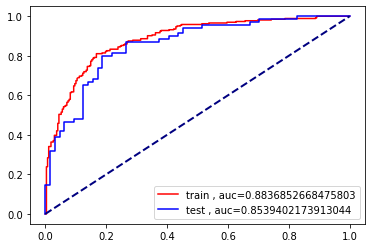

In [5]:
# สร้าง ROC Curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
 
clf_model = logreg.fit(X_train, y_train)
y_score_train = clf_model.predict_proba(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train,  y_score_train[:,1])
auc_train = roc_auc_score(y_train, y_score_train[:,1])
plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

y_score_test = clf_model.predict_proba(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
auc_test = roc_auc_score(y_test, y_score_test[:,1])
plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

In [6]:
def plot_roc(clf, X_train, y_train, X_test, y_test):
  
  from sklearn.metrics import roc_curve, auc, roc_auc_score
  import matplotlib.pyplot as plt

  clf_model = clf.fit(X_train, y_train)
  y_score_train = clf_model.predict_proba(X_train)
  fpr_train, tpr_train, _ = roc_curve(y_train,  y_score_train[:,1])
  auc_train = roc_auc_score(y_train, y_score_train[:,1])
  plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

  y_score_test = clf_model.predict_proba(X_test)
  fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
  auc_test = roc_auc_score(y_test, y_score_test[:,1])
  plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.legend(loc=4)
  plt.show()

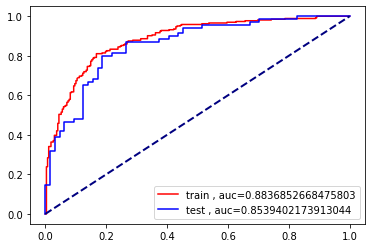

In [7]:
plot_roc(logreg, X_train, y_train, X_test, y_test)

## กรณีที่ Positive และ Negative มีจำนวนไม่ต่างกันมาก (ฺBalanced)

In [8]:
# Load module ที่เราต้องการใช้ทั้งหมด

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [9]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/ai-builders/curriculum/raw/main/data/marketing_campaign.csv'
df = pd.read_csv(url, parse_dates=['Dt_Customer'])

In [10]:
df_summary = df[['ID', 'Response']].groupby(by=['Response']).count().reset_index()
df_summary['Percentage'] = df_summary['ID']/df_summary['ID'].sum()
print(df_summary)

   Response   ID  Percentage
0         0  334         0.5
1         1  334         0.5


<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/46.png width="750px">

## กรณีที่ Positive และ Negative มีจำนวนต่างกันมาก (ฺImbalanced)

ข้อมูลโดยทั่วไปที่เจอในการทำงานจริงนั้น จะมีจำนวน Positive และ Negative ที่ต่างกันค่อนข้างมาก

In [11]:
# อ่านไฟล์ข้อมูลที่ต้องการวิเคราะห์

url = 'https://github.com/ai-builders/curriculum/raw/main/data/marketing_campaign_full.csv'
df = pd.read_csv(url, parse_dates=['Dt_Customer'])

In [12]:
df_summary = df[['ID', 'Response']].groupby(by=['Response']).count().reset_index()
df_summary['Percentage'] = df_summary['ID']/df_summary['ID'].sum()
print(df_summary)

   Response    ID  Percentage
0         0  1906    0.850893
1         1   334    0.149107


In [13]:
# ลบ row ที่มี missing value

df = df.dropna(how='any',axis=0) 

In [14]:
# จัดการ Time-related column

cut_off_year = 2016
df['Age'] = cut_off_year - df['Year_Birth']
df['Member_Age'] = cut_off_year - df['Dt_Customer'].dt.year

In [15]:
# feature engineering

df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/df['Total_Spend']
for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
  col_name = 'PCT_' + i
  df[col_name] = df[i]/ (df['Total_Purchases']+1e-6) #prevent dividing by zero
df['PCT_DealsPurchases'] = df['NumDealsPurchases']/(df['Total_Purchases']+1e-6) #prevent dividing by zero
df['PCT_Campaigns'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1) / 5

In [16]:
# one-hot encoding

df_dummmies = pd.get_dummies(df[['Education','Marital_Status']])
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [17]:
# สร้าง X และ y

X = df.drop(['ID', 'Response', 'Year_Birth', 'Dt_Customer', 'Education','Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = df['Response']

In [18]:
# rescale X

scaler = StandardScaler()

x_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled_array)
X_scaled.columns = X.columns

In [19]:
# สร้าง Train-Test Dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [20]:
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  print('training set')
  print(report_train) 
  print('\n')
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)
  print('test set')
  print(report_test) 
  print('\n')

  if show_feature_importance:
    try:
      print('Standardized Coeff.')
      print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.coef_[0]}).to_string())
    except:
      try:
        print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.feature_importances_}).to_string())
      except:
        print("No Standardized Coeff.")

In [21]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train, y_train, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1512
           1       0.48      0.85      0.61       260

    accuracy                           0.84      1772
   macro avg       0.72      0.84      0.75      1772
weighted avg       0.90      0.84      0.86      1772



test set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       371
           1       0.50      0.85      0.63        73

    accuracy                           0.83       444
   macro avg       0.73      0.84      0.76       444
weighted avg       0.89      0.83      0.85       444





# Fixing imbalanced with resampling

## Undersampling

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยลดฝั่งที่มีจำนวนเยอะกว่า

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [23]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_undersampled, y_train_undersampled, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       260
           1       0.87      0.87      0.87       260

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520



test set
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       371
           1       0.46      0.93      0.61        73

    accuracy                           0.81       444
   macro avg       0.72      0.86      0.74       444
weighted avg       0.90      0.81      0.83       444





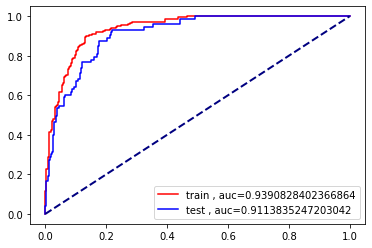

In [24]:
plot_roc(logreg, X_train_undersampled, y_train_undersampled, X_test, y_test)

## Oversampling

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยเพิ่งฝั่งที่มีจำนวนน้อยกว่า

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

In [26]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_oversampled, y_train_oversampled, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1512
           1       0.84      0.85      0.85      1512

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024



test set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       371
           1       0.48      0.85      0.61        73

    accuracy                           0.82       444
   macro avg       0.72      0.83      0.75       444
weighted avg       0.89      0.82      0.84       444





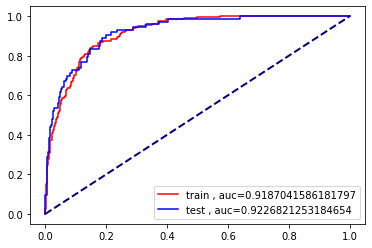

In [27]:
plot_roc(logreg, X_train_oversampled, y_train_oversampled, X_test, y_test)

## SMOTE - Synthetic Minority Oversampling Technique

เป็นการทำให้จำนวน Positive และ Negative เท่ากัน โดยเพิ่งฝั่งที่มีจำนวนน้อยกว่า จากการสร้าง data จำลองขึ้นมาบนเส้นที่ขีดเชื้่อมกันระหว่างจุดข้อมูลเดิม

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/47.png width="750px">

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [29]:
# run model

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_sm, y_train_sm, X_test, y_test, show_feature_importance=False)

training set
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1512
           1       0.84      0.87      0.86      1512

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



test set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       371
           1       0.50      0.86      0.63        73

    accuracy                           0.84       444
   macro avg       0.73      0.85      0.76       444
weighted avg       0.89      0.84      0.85       444





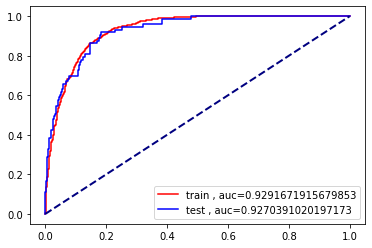

In [30]:
plot_roc(logreg, X_train_sm, y_train_sm, X_test, y_test)

# Checkpoint ท้ายบท

*   ☑️ เข้าใจถึงเลือกใช้ Metric ในการประเมินความแม่นยำของโมเดล
*   ☑️ เข้าใจถึงปัญหา Imbalanced Dataset
*   ☑️ สามารถแก้ไขปัญหา Imbalanced Dataset เบื้องต้นได้